# Analysis of new s1 model with priorized l1


## Quantitative observations

In the following I will refer to the s1 that uses a l1 with a prior as `memoized_l1` or `memo_l1`.

All of the following comparisons are done using batch size = 32.

Using the same alpha and beam size, the memo_l1 speaker does slightly worse than basic s1 in terms of listener accuracy, but better in terms of METEOR score. 

Larger beam size increases accuracy in general, for both basic and memo_l1 pragmatic speakers.

I took the harmonic mean of listener accuracy and METEOR score, and for 5 distractors, memo_l1 was on par with basic, for 10 distractors, memo_l1 does much better than s0.

**Issue of batch size affecting results**

This may be due to a bug I may need more time to find out the reason. One thing I am sure is that **using a different batch size may generate a different set of distractors, due to different randomness in the distractor sampling process.** Nevertheless BERT's selection of surprising words should not be affected. The trial that we previously ran used an output from an s1 and s0 running on 9 distractors, with beam_size=10. I used a batch_size=32 for these so the results were fair.

For consistency, in all of the following experiments I only looked at examples with batch_size=32. As a result I was not able to obtain results for 9 distractors using an S1 with beam_size=20 if I set the batch size to 32, because my computer ran out of memory. Previously I set it to 16.


## Qualitative observations

In general s1_memo_b10 is in many cases similar to s0_b10. In this way it sometimes keeps the important information that s0 captures.

Large beam size adversely affects memo_l1 in terms of fluency, but **not** basic s1. Qualitatively memo_l1 starts to double words or phrases starting from the 4th or 5th word in the summary. This does not appear to be a problem for small beam sizes.

By looking at some of the following examples, there is still a tendency for the model to fixate on a surpirsing word found by BERT, which might not be the most important in the original sentence.


## Some examples

All of the s1 examples below use alpha = 1.5, using 4 distractors.
I've picked out potentially problematic or good ones. The following are taken out of a random sample of 200 outputs.
```
1
      source: legislators from the ##-nation post-soviet commonwealth of independent states said wednesday it should create a permanent peacekeeping force and seek international recognition for it .
        gold: cis peacekeeping force sought
      s0_b10: commonwealth lawmakers call for permanent peacekeeping force
s1_basic_b10: legislators to create permanent peacekeeping force
s1_basic_b20: legislators seek permanent peacekeeping force
 s1_memo_b10: legislators call for permanent peacekeeping force
 s1_memo_b20: legislators to create permanent peacekeeping force
 
2
      source: brazil 's world cup team returned to their home away from home on wednesday to start plotting a fourth of july downfall for the united states .
        gold: brazil at home in san francisco
      s0_b10: brazil 's world cup returns home
s1_basic_b10: brazil s world cup returns home
s1_basic_b20: brazil s world cup returns home
 s1_memo_b10: world cup returns to brazil
 s1_memo_b20: brazil plotting downfall plotting plotting downfall
 
3
      source: an australian who heads rio tinto 's iron ore operations in china has been arrested in shanghai and accused of espionage , australia 's foreign minister said wednesday .
        gold: australian detained on espionage charge in china
      s0_b10: australia arrests rio tinto who accused of espionage
s1_basic_b10: australia arrests rio tinto who accused of espionage
s1_basic_b20: australia arrests rio tinto who accused of espionage
 s1_memo_b10: australia arrests rio tinto for espionage
 s1_memo_b20: australia arrests rio tinto espionage accused of espionage
 
4
      source: angry farmers thursday attacked and trashed a greenhouse at a research facility belonging to u.s.-based monsanto corp. , which sells genetically modified seeds , the company said .
        gold: protesters attack monsanto 's greenhouse in southern india
      s0_b10: farmers attack monsanto research facility
s1_basic_b10: angry farmers trash greenhouse at monsanto
s1_basic_b20: angry farmers trash greenhouse at monsanto
 s1_memo_b10: angry farmers trash greenhouse at monsanto research facility
 s1_memo_b20: angry farmers trash monsanto monsanto greenhouse gas facility

5
      source: a handwritten copy of the book of psalms will be returned to ethiopia ### years after it was seized by british soldiers , a group that returns looted treasures to the african nation said tuesday .
        gold: holy book to return to ethiopia after ### years
      s0_b10: copy of psalms book to be returned to ethiopia
s1_basic_b10: handwritten book of psalms to be returned to ethiopia
s1_basic_b20: handwritten book of psalms to be returned to ethiopia
 s1_memo_b10: copy of psalms book to be returned to ethiopia
 s1_memo_b20: handwritten book of handwritten psalms handwritten to be returned to ethiopia

6
      source: jamaican tourism is in crisis , confronting dwindling numbers of visitors and a government failure to counter this with advertising in the critical u.s. and european markets , an industry leader said thursday .
        gold: industry leader blames tourism crisis on government failure to
      s0_b10: jamaican tourism in crisis industry leader says
s1_basic_b10: jamaica in crisis industry leader says
s1_basic_b20: jamaica in crisis industry leader says
 s1_memo_b10: jamaica 's tourism in crisis industry leader says
 s1_memo_b20: jamaica tourism confronting dwindling numbers industry leader says

7 
      source: more than ## years after the end of world war ii , german lawmakers friday completed the rehabilitation of tens of thousands of nazi-era army deserters and homosexual victims sent to concentration camps .
        gold: victims of nazi persecution _ homosexuals deserters _ to be
      s0_b10: germany completes rehabilitation of nazi victims
s1_basic_b10: germany completes nazi-era concentration camp
s1_basic_b20: germany completes nazi-era concentration camp
 s1_memo_b10: germany completes rehabilitation of nazi victims
 s1_memo_b20: germany completes tens of thousands of concentration concentration camps
 
8
      source: tactics used by resurgent taliban insurgents in their fight against international and local forces in afghanistan are similar to those used by hezbollah guerillas in lebanon , a senior nato official said tuesday .
        gold: taliban using similar tactics in afghanistan as hezbollah in lebanon nato says
      s0_b10: nato says taliban tactics similar to hezbollah
s1_basic_b10: senior nato official criticizes taliban tactics in lebanon
s1_basic_b20: senior nato official criticizes taliban tactics in lebanon
 s1_memo_b10: nato tactics in lebanon similar to hezbollah
 s1_memo_b20: nato tactics in lebanon tactics similar senior tactics
 
9
      source: japan 's brazilian coach zico has named a full strength squad of ## players the for forthcoming kirin cup games against argentina and paraguay next week .
        gold: zico looks to europe for inspiration
      s0_b10: zico names squad for kirin cup
s1_basic_b10: japan squad for kirin cup
s1_basic_b20: brazilian strength squad for kirin cup
 s1_memo_b10: brazil names squad for kirin cup
 s1_memo_b20: zico to strength full strength for forthcoming kirin cup

10
      source: olympic champions liu guoliang and kong linghui fought a five-set thriller to beat austrian duo werner schlager and karl <unk> in the men 's doubles quarter-finals of the world table tennis championships here on friday .
        gold: # chinese pairs make men 's doubles semis
      s0_b10: results of world table tennis championships
s1_basic_b10: olympic champs liu kong advance at table tennis worlds
s1_basic_b20: olympic champs liu kong advance at table tennis worlds
 s1_memo_b10: olympic champs liu into quarter-finals
 s1_memo_b20: olympic champions liu kong linghui advance in table tennis worlds
 
11
      source: the group of eight -lrb- g-# -rrb- leaders said on wednesday that they will push slow-moving world trade negotiations quickly and clear key obstacles to the trade talk by the end of july .
        gold: g-# leaders vow to clear key obstacles to world trade talk
      s0_b10: g-# leaders say they will push trade talks quickly
s1_basic_b10: g-# leaders say they will push trade talks quickly quickly
s1_basic_b20: g-# will push world trade talks quickly quickly
 s1_memo_b10: g-# leaders to push trade talks quickly
 s1_memo_b20: g-# will push world quickly slow-moving quickly
 
12
      source: kansas gas service 's ###,### customers wo n't have to worry about soaring heating bills wrecking their household budgets next winter , thanks to a new program the utility has in place .
        gold: kansas gas program locks in price for all natural gas next winter
      s0_b10: heating bills wo n't hurt customers
s1_basic_b10: soaring heating bills wrecking budgets
s1_basic_b20: heating bills next winter
 s1_memo_b10: heating bills wo n't hurt budgets
 s1_memo_b20: heating bills wrecking budgets
 
13
      source: president george w. bush 's nominee to lead the regulatory food and drug administration , ensnared in a controversy over an emergency contraceptive known as the morning-after pill , told senators tuesday that `` sound science '' would guide the agency under his leadership .
        gold: morning-after pill entangles bush 's nominee to lead drug agency
      s0_b10: bush nominee defends morning-after pill
s1_basic_b10: senators criticize senators nominee for morning-after pill
s1_basic_b20: senators criticize senators nominee for morning-after pill
 s1_memo_b10: senators question bush nominee
 s1_memo_b20: us senators spar over contraceptive contraceptive contraceptive
 
14
      source: the united states and its partners are making modest gains in some key areas of afghanistan , but the insurgency is still strong and expanding across the country , a pentagon report to congress this month has concluded .
        gold: pentagon report cites gains in afghanistan
      s0_b10: pentagon reports modest gains in afghanistan
s1_basic_b10: u.s. partners make modest gains in afghanistan
s1_basic_b20: pentagon report finds insurgency still strong
 s1_memo_b10: pentagon report says insurgency still strong
 s1_memo_b20: pentagon report says insurgency still strong
 
15
      source: many of the british retail shops opened one day earlier on thursday , the boxing day , to welcome shoppers in an effort to get an upper hand over others after a poor christmas .
        gold: british shoppers flood to early sales
      s0_b10: british retail shops open one day earlier
s1_basic_b10: boxing day boxing day opens in london
s1_basic_b20: boxing day boxing day opens
 s1_memo_b10: boxing shops open in london
 s1_memo_b20: boxing day boxing day opens boxing day


```

## Preliminary conclusions:

Suggestions for pilot test:

4 distractors, basic s1, alpha = 1.5, beam_size = 20  
`/home/hansonlu/links/data/2031val/2031val_1110_133158_acc39.19_rglf40.57.txt`  
Justification: this improves upon basic s1, beam_size = 10 in terms of accuracy, without similar rouge/METEOR score.

4 distractors, memo_l1 s1, alpha = 1.5, beam_size = 10  
`/home/hansonlu/links/data/2031val/2031val_1109_235527_acc36.24_rglf41.89.txt`  
Justification: this potentially improves upon basic s1 with same beam size in terms of fluency, without similar listener accuracy.

(basic s1, alpha=1.5, beam_size = 10 has listener acc 36.93%, rglf 40.91%, METEOR 0.205)

9 distractors, memo_l1 s1, alpha = 1.5, beam_size = 10  
`/home/hansonlu/links/data/2031val/2031val_1110_111552_acc28.95_rglf41.41.txt`
Justification: although accuracy is 1 point lower than basic s1 with same other parameters, the harmonic average of listener accuracy and METEOR is higher than it. Listener accuracy still exceeds that of s0, which is 26.55%.


## setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("filtered_memo_l1_res.csv")

In [3]:
for i, row in df.iterrows():
    if row['mode'] == 's0':
        df['pragmatics'][i] = 's0'



/home/hansonlu/anaconda2/envs/opennmt/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
accs = df['listener_acc'].values
meteors = df['METEOR'].values
harmonic_mean = 2. / (1./accs + 1./meteors)
df['acc_METEOR_mean'] = harmonic_mean


In [ ]:
df

In [6]:
def plot_metric_by_param_for_pragmatics(df, metric, param, line_plot=True):
    s1_df_acc = pd.pivot_table(
        df, 
        index=param, 
        columns='pragmatics', 
        values=metric,
        aggfunc='max')
    if line_plot:
        ax = s1_df_acc.plot()
        ax.set_ylabel(metric)
        ax.set_xticks(df[param].unique())
    else:
        ax = s1_df_acc.plot(style="o")
        ax.set_ylabel(metric)
        # ax.set_xticks(df[param].unique())
    return ax

## METEOR analysis for different number of distractors

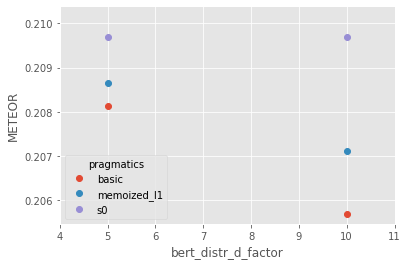

In [28]:
test_df = df
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'bert_distr_d_factor', line_plot=False)
ax.set_xlim(4, 11)
ax

## Analysis for 4 distractors

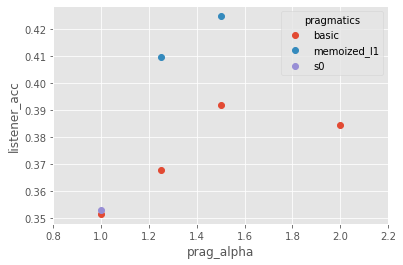

In [7]:
test_df = df[(df['bert_distr_d_factor'] == 5)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'listener_acc', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

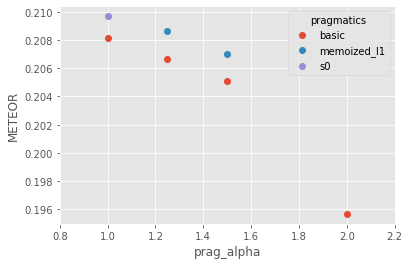

In [8]:
test_df = df[(df['bert_distr_d_factor'] == 5)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

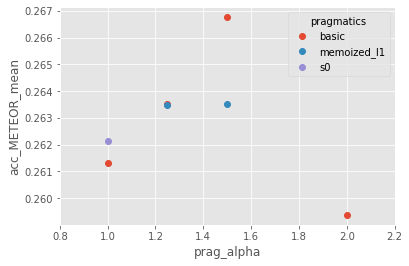

In [9]:
test_df = df[(df['bert_distr_d_factor'] == 5)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'acc_METEOR_mean', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

### Comparing basic and memoized_l1 under different alphas, with fixed beam size

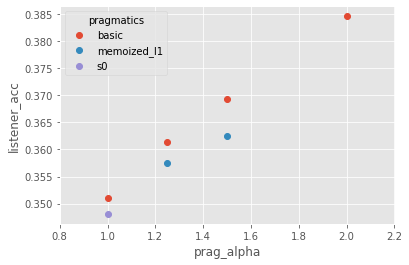

In [10]:
test_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['beam_size'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'listener_acc', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

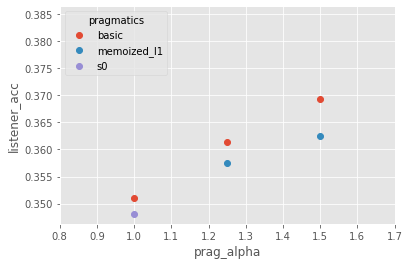

In [23]:
test_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['beam_size'] == 20)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'listener_acc', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 1.7)
ax

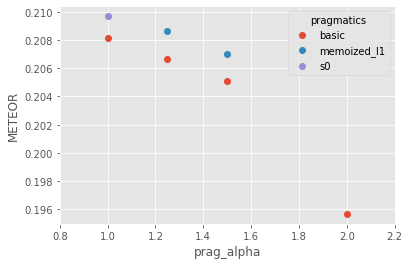

In [12]:
test_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['beam_size'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

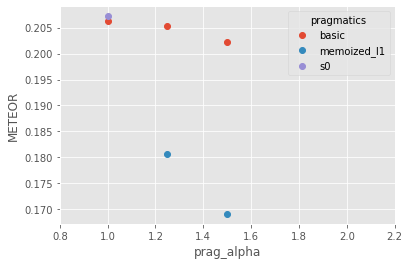

In [24]:
test_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['beam_size'] == 20)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

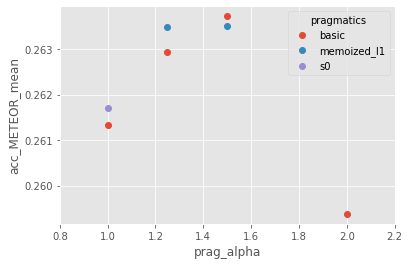

In [13]:
test_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['beam_size'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'acc_METEOR_mean', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

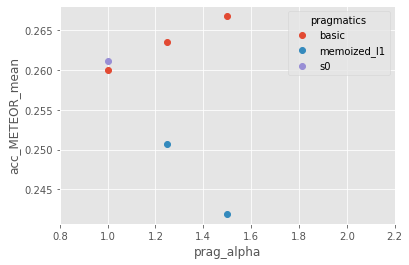

In [25]:
test_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['beam_size'] == 20)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'acc_METEOR_mean', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

### Comparing the effect of beam size on basic and memoized_l1 under the same alpha

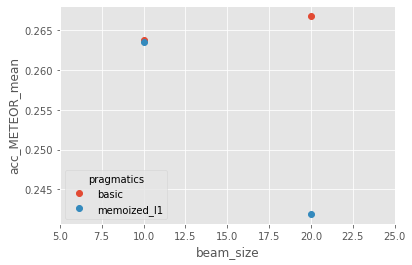

In [14]:
alpha1p5_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['prag_alpha'] == 1.5)]
ax = plot_metric_by_param_for_pragmatics(alpha1p5_df, 'acc_METEOR_mean', 'beam_size', line_plot=False)
ax.set_xlim(5, 25)
ax

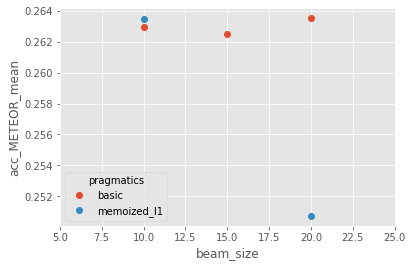

In [15]:
alpha1p5_df = df[(df['bert_distr_d_factor'] == 5) &
                 (df['prag_alpha'] == 1.25)]
ax = plot_metric_by_param_for_pragmatics(alpha1p5_df, 'acc_METEOR_mean', 'beam_size', line_plot=False)
ax.set_xlim(5, 25)
ax

## Analysis for 9 distractors

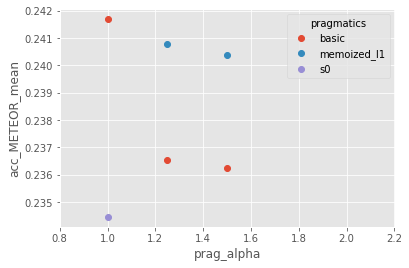

In [16]:
test_df = df[(df['bert_distr_d_factor'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'acc_METEOR_mean', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

### Comparing basic and memoized_l1 under different alphas, with fixed beam size

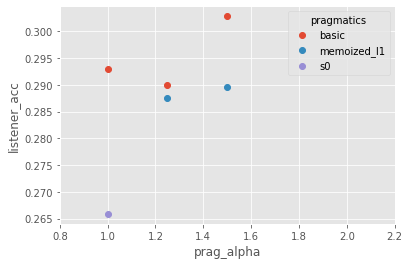

In [17]:
test_df = df[(df['bert_distr_d_factor'] == 10) &
                 (df['beam_size'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'listener_acc', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

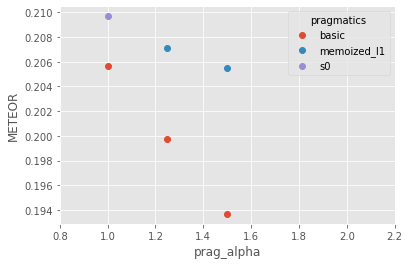

In [18]:
test_df = df[(df['bert_distr_d_factor'] == 10) &
                 (df['beam_size'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

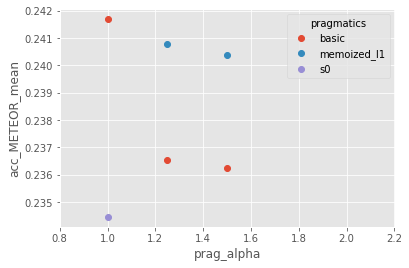

In [19]:
test_df = df[(df['bert_distr_d_factor'] == 10) &
                 (df['beam_size'] == 10)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'acc_METEOR_mean', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

### Comparing the effect of beam size on both speakers with fixed alpha

This part was not completed because my computer did not have enough memory to run 9 distractors, 20 beam size and 32 batch size.

/home/hansonlu/anaconda2/envs/opennmt/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


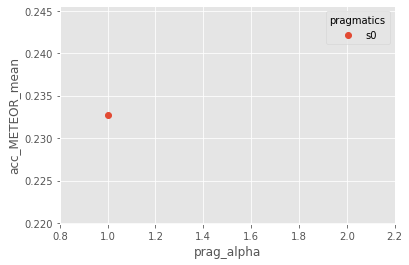

In [20]:
test_df = df[(df['bert_distr_d_factor'] == 10) &
                 (df['beam_size'] == 20)]
ax = plot_metric_by_param_for_pragmatics(test_df, 'acc_METEOR_mean', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

## METEOR results in general



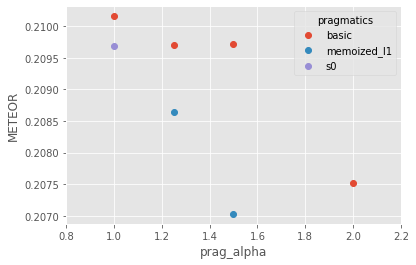

In [21]:
test_df = df
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'prag_alpha', line_plot=False)
ax.set_xlim(0.8, 2.2)
ax

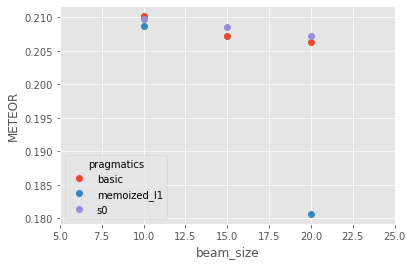

In [22]:
test_df = df
ax = plot_metric_by_param_for_pragmatics(test_df, 'METEOR', 'beam_size', line_plot=False)
ax.set_xlim(5,25)
ax